# 1. 构造数据集

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

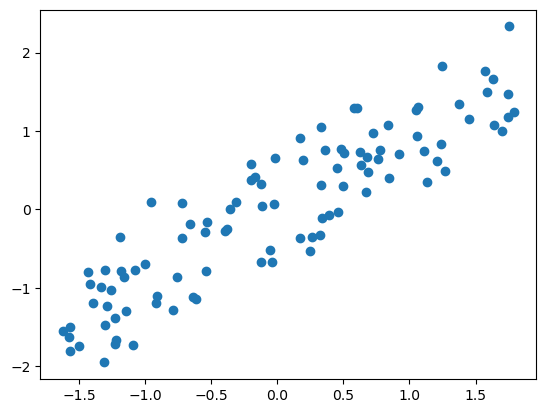

In [63]:

np.random.seed(0)

# 生成100个线性分布数据点(带噪声),然后归一化处理
w, b = 1.8, 2.5
x1 = np.random.rand(100) * 4
noise = np.random.randn(100)
x2 = w * x1 + b + noise
x = np.vstack([x1, x2]).T
# 使用sklean方法对x进行零均值归一化
scaler = StandardScaler()
x = scaler.fit_transform(x)
x.shape
plt.scatter(x[:, 0], x[:, 1])
plt.show()

# 2. PCA

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA(n_components=1) # 保留一个主成分
# 对数据进行PCA拟合，计算主成分和变换矩阵
pca.fit(x)

# 使用训练好的PCA模型将数据转换到新的低维空间(一维)
x_pca = pca.transform(x)

# 使用inverse_transform将降维后的数据转换回原始空间
x_pca_inv = pca.inverse_transform(x_pca)

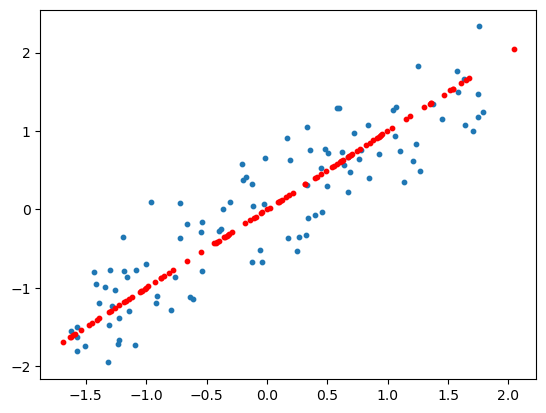

In [66]:
plt.scatter(x[:, 0], x[:, 1], s = 10)
plt.scatter(x_pca_inv[:, 0], x_pca_inv[:, 1], s = 10, c = 'r')
plt.show()

# 3. 图像降噪

In [67]:
from sklearn.datasets import load_digits
# 使用手写数字数据集
digits = load_digits()
x = digits.data
y = digits.target
x.shape, y.shape

((1797, 64), (1797,))

In [86]:
# 绘制输入数据中的前10个手写数字图像
def plot_top_digits(x,n=10):
    plt.rcParams["figure.figsize"] = (5, 2) # 设置图形大小为12x8
    for i in range(n):
        # 在4x5网格中创建子图，i+1是因为subplot从1开始计数
        plt.subplot(2, int(n/2), i + 1)
        
        # 移除x和y轴刻度，使显示更清晰
        plt.xticks([])
        plt.yticks([])
        # plt.imshow()用于显示图像数据
        # x[i].reshape(8, 8): 将一维数组重塑为8x8的二维数组，因为手写数字图像原来是8x8像素的
        # cmap=plt.cm.gray_r: 使用反转的灰度颜色映射
        #   - gray_r中的'r'表示reversed(反转)
        #   - 原始数据中0表示黑色，较大的值表示白色
        #   - 使用gray_r后，0将显示为白色，较大的值显示为黑色
        #   - 这样可以让数字显示为黑色，背景显示为白色，更符合人类视觉习惯
        # interpolation="nearest": 设置像素插值方式
        #   - "nearest"表示最近邻插值
        #   - 当图像需要放大时，新像素的值取最近的原始像素值
        #   - 这种方式能保持像素的锐利边缘，适合显示数字图像
        plt.imshow(x[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")
    
    # 显示包含所有子图的完整图形
    plt.tight_layout()
    plt.show()

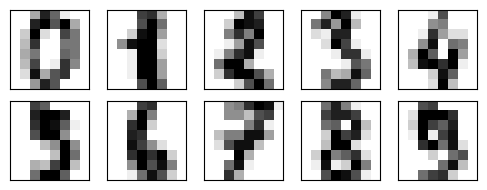

In [87]:
plot_top_digits(x)

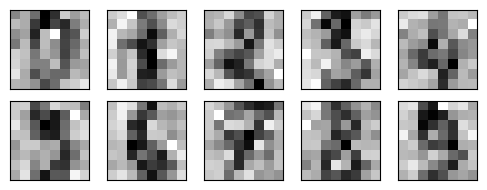

In [88]:
# 我们可以给图像添加噪声来观察后续PCA降噪的效果
np.random.seed(0)
x_noise = x + np.random.randn(x.shape[0], x.shape[1]) * 3
plot_top_digits(x_noise)

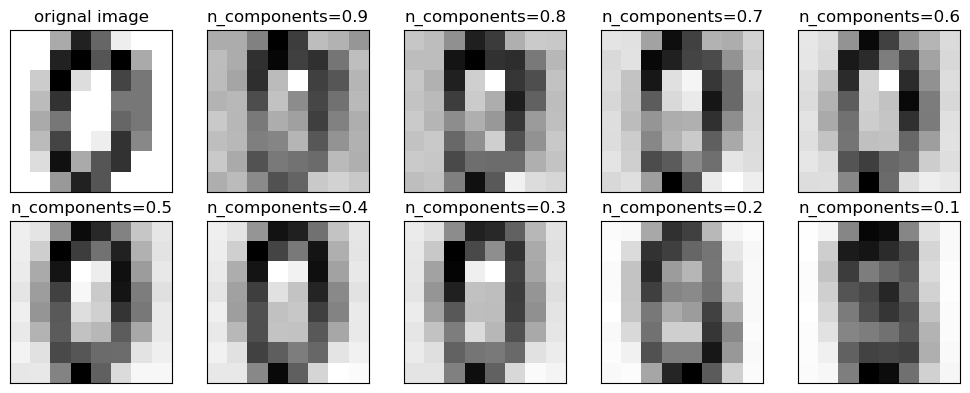

In [ ]:

plt.rcParams["figure.figsize"] = (10, 4)

# 绘制原始图像
plt.subplot(2, 5, 1)
plt.title(f'orignal image')
plt.xticks([])
plt.yticks([])
plt.imshow(x[0].reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")

# 绘制给添加噪音后的图像降噪后的结果
for i, ratio in enumerate(np.linspace(0.9, 0.1, 9)):
    plt.subplot(2, 5, i+2)
    plt.title(f'n_components={ratio:.1f}')
    pca = PCA(n_components=ratio)
    pca.fit(x_noise)
    x_noise_pca = pca.transform(x_noise)
    x_noise_inv = pca.inverse_transform(x_noise_pca)
    n_components = pca.n_components_
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_noise_inv[0].reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")
plt.tight_layout()
plt.show()
# 可以看到保留50%的主成分时，图像的噪声已经被去除得差不多了